In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import *
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

2018-05-08 16:53:49,981 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [4]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [5]:
train_batch = train_data[0:1000]
test_batch = train_data[0:5000]

In [6]:
%%time
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english')
train_data_features = tf_vect.fit_transform(train_batch.text)

CPU times: user 1.23 s, sys: 441 µs, total: 1.23 s
Wall time: 1.85 s


In [7]:
%%time
knn_naive_dv = KNeighborsClassifier(n_neighbors=20, n_jobs=3, algorithm='brute', metric='cosine' )
knn_naive_dv.fit(train_data_features, train_batch.stars)

CPU times: user 2.12 ms, sys: 223 µs, total: 2.34 ms
Wall time: 2.61 ms


In [8]:
test_batch_transform = tf_vect.transform(test_batch.text)
predicted = knn_naive_dv.predict(test_batch_transform)

accuracy 0.5068
confusion matrix
 [[ 359   12   14  116  202]
 [ 126   14   32  163   84]
 [  74    7   36  318  117]
 [  61    4   26  627  444]
 [ 102    9   20  535 1498]]
(row=expected, col=predicted)


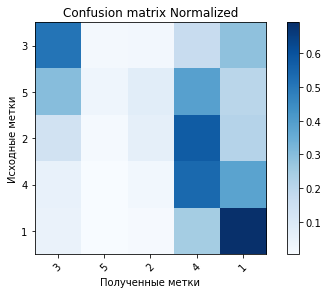

In [9]:
evaluate_prediction(predicted, test_batch.stars)

In [10]:
cohen_kappa_score(test_batch.stars, predicted)

0.28662206347779207

In [11]:
hamming_loss(test_batch.stars, predicted)

0.4932

In [12]:
jaccard_similarity_score(test_batch.stars, predicted)

0.5068

In [15]:
matthews_corrcoef(test_batch.stars, predicted)

0.29319713720667023

Classification metrics:

In [20]:
explained_variance_score(test_batch.stars, predicted)

0.032370607441890575

In [21]:
mean_absolute_error(test_batch.stars, predicted)

0.862

In [22]:
mean_squared_error(test_batch.stars, predicted)

2.0724

In [23]:
mean_squared_log_error(test_batch.stars, predicted)

0.14883384792006393

In [25]:
r2_score(test_batch.stars, predicted)

5.355821995645105e-05